# Install
We have MMpretrain installed for you when you see this page

# Start trying
Ensure you have selected the right kernel (on the top right corner of jupyter lab interface), the one you have just named <br>
now we change the directory to the installed location

In [1]:
cd mmpretrain

/home/test/carasml/classification/mm_Resnet/mmpretrain


/home/test/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# Load a model
there are plenty of pretrained models <br>
you may check what models are available on <br>
https://mmpretrain.readthedocs.io/en/stable/modelzoo_statistics.html <br>

In [2]:
from mmpretrain.apis import list_models
from mmpretrain.apis import get_model
from mmpretrain.apis import inference_model

In [3]:
# here we search any model that named with 'resnet'
list_models(task='Image Classification', pattern='resnet')

['resnet101_8xb16_cifar10',
 'resnet101_8xb32_in1k',
 'resnet152_8xb16_cifar10',
 'resnet152_8xb32_in1k',
 'resnet18_8xb16_cifar10',
 'resnet18_8xb32_in1k',
 'resnet34_8xb16_cifar10',
 'resnet34_8xb32_in1k',
 'resnet50_8xb16_cifar10',
 'resnet50_8xb16_cifar100',
 'resnet50_8xb256-rsb-a1-600e_in1k',
 'resnet50_8xb256-rsb-a2-300e_in1k',
 'resnet50_8xb256-rsb-a3-100e_in1k',
 'resnet50_8xb32-fp16_in1k',
 'resnet50_8xb32_in1k',
 'resnet50_8xb8_cub',
 'resnet50_barlowtwins-pre_8xb32-linear-coslr-100e_in1k',
 'resnet50_byol-pre_8xb512-linear-coslr-90e_in1k',
 'resnet50_densecl-pre_8xb32-linear-steplr-100e_in1k',
 'resnet50_mocov2-pre_8xb32-linear-steplr-100e_in1k',
 'resnet50_mocov3-100e-pre_8xb128-linear-coslr-90e_in1k',
 'resnet50_mocov3-300e-pre_8xb128-linear-coslr-90e_in1k',
 'resnet50_mocov3-800e-pre_8xb128-linear-coslr-90e_in1k',
 'resnet50_simclr-200e-pre_8xb512-linear-coslr-90e_in1k',
 'resnet50_simclr-800e-pre_8xb512-linear-coslr-90e_in1k',
 'resnet50_simsiam-100e-pre_8xb512-linear-c

In [4]:
# suppose we pick a random one
model_name = 'resnetv1d50_8xb32_in1k'
model = get_model(model_name, pretrained=True)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmclassification/v0/resnet/resnetv1d50_b32x8_imagenet_20210531-db14775a.pth


In [5]:
model._metainfo

Model(
  Name=resnetv1d50_8xb32_in1k,
  Metadata=Metadata(
    FLOPs=4360000000,
    Parameters=25580000,
    _filepath=mmpretrain/.mim/configs/resnet/metafile.yml
  ),
  Results=[
    Result(
      Task=Image Classification,
      Dataset=ImageNet-1k,
      Metrics={'Top 1 Accuracy': 77.54, 'Top 5 Accuracy': 93.57},
      _filepath=mmpretrain/.mim/configs/resnet/metafile.yml
    ),
  ],
  Weights=https://download.openmmlab.com/mmclassification/v0/resnet/resnetv1d50_b32x8_imagenet_20210531-db14775a.pth,
  Config=Config (path: /home/test/carasml/classification/mm_Resnet/mmpretrain/mmpretrain/.mim/configs/resnet/resnetv1d50_8xb32_in1k.py): {'model': {'type': 'ImageClassifier', 'backbone': {'type': 'ResNetV1d', 'depth': 50, 'num_stages': 4, 'out_indices': (3,), 'style': 'pytorch'}, 'neck': {'type': 'GlobalAveragePooling'}, 'head': {'type': 'LinearClsHead', 'num_classes': 1000, 'in_channels': 2048, 'loss': {'type': 'CrossEntropyLoss', 'loss_weight': 1.0}, 'topk': (1, 5)}, 'data_preprocesso

In [6]:
model._dataset_meta

{'classes': ['tench, Tinca tinca',
  'goldfish, Carassius auratus',
  'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
  'tiger shark, Galeocerdo cuvieri',
  'hammerhead, hammerhead shark',
  'electric ray, crampfish, numbfish, torpedo',
  'stingray',
  'cock',
  'hen',
  'ostrich, Struthio camelus',
  'brambling, Fringilla montifringilla',
  'goldfinch, Carduelis carduelis',
  'house finch, linnet, Carpodacus mexicanus',
  'junco, snowbird',
  'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
  'robin, American robin, Turdus migratorius',
  'bulbul',
  'jay',
  'magpie',
  'chickadee',
  'water ouzel, dipper',
  'kite',
  'bald eagle, American eagle, Haliaeetus leucocephalus',
  'vulture',
  'great grey owl, great gray owl, Strix nebulosa',
  'European fire salamander, Salamandra salamandra',
  'common newt, Triturus vulgaris',
  'eft',
  'spotted salamander, Ambystoma maculatum',
  'axolotl, mud puppy, Ambystoma mexicanum',
  'bullfr

# Try an image


In [7]:
import torch
# generate dummy input image, the shape is batch size, channel (RGB), height, width respectively
# find the size in model._metainfo, the 'size' before 'type': 'PackInputs'
x = torch.randn(1, 3, 224, 224)
# function model input the batch of images and return output
y = model(x)
# resnet34 return 1000 class raw output logits
print(y.shape)
# use softmax to convert it to probability
probs = torch.nn.functional.softmax(y, dim=1)
print(probs.sum())

torch.Size([1, 1000])
tensor(1.0000, grad_fn=<SumBackward0>)


In [8]:
# use a real image
img = 'demo/demo.JPEG'
result = inference_model(model, img)
print(result)
# it tells you the image is sea snake

{'pred_scores': array([2.48514063e-08, 2.85595299e-08, 8.21072703e-08, 3.95184173e-07,
       6.39882501e-07, 9.37030734e-07, 7.83699488e-06, 6.64803181e-08,
       2.96941529e-08, 1.64459598e-05, 5.31829869e-08, 4.74876716e-09,
       5.14396392e-09, 3.49255878e-08, 3.63763264e-09, 2.59873332e-08,
       2.72849654e-09, 4.71445745e-08, 1.32727527e-08, 5.17442977e-09,
       3.75936526e-09, 4.31875158e-08, 1.62206995e-08, 1.78197709e-07,
       7.69313147e-09, 3.82632592e-08, 1.01472574e-06, 7.61712329e-08,
       5.54184432e-08, 1.14748687e-07, 3.56753674e-07, 1.83432913e-09,
       8.38516669e-08, 1.51231698e-05, 1.29538836e-04, 3.06982372e-07,
       1.14701481e-06, 1.77625328e-08, 2.47037824e-05, 4.93303269e-05,
       9.88281741e-08, 3.16036865e-04, 6.96186107e-05, 1.92465741e-05,
       9.12828764e-05, 6.30077102e-06, 1.51994914e-06, 3.43768056e-06,
       4.16975563e-05, 1.08623744e-05, 7.33375709e-05, 1.58700519e-08,
       3.07928160e-04, 3.11092357e-04, 2.89508533e-02, 1.4711

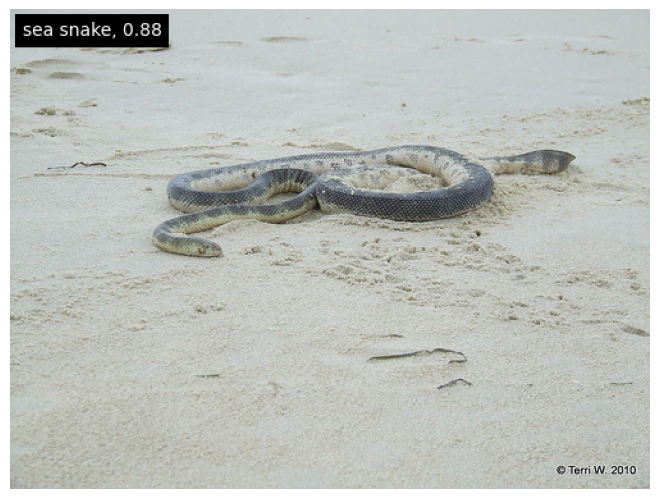

In [9]:
# plot it
import mmcv
from mmengine.visualization import Visualizer
import torch
image = mmcv.imread(img, channel_order='rgb')
pred_score = result['pred_score'] #the estimated probability of the image belong to specific class
pred_class = result['pred_class']
pred_print = f'{pred_class}, {pred_score:.2f}'
visualizer = Visualizer(image=image)
visualizer.draw_texts(pred_print, torch.tensor([10, 10]), font_sizes=10, colors='white', bboxes=dict(facecolor='black', linewidth=0, alpha=1))
visualizer.show()

# Prepare dataset
We use a subset (airplane and motorbike) of caltech101 as demo <br>
The dataset should be in below format

If you have your dataset labeled with labelme, you can use the below script to convert it to above specified format <br>
We can skip if you proceed with the given caltech101 dataset

In [ ]:
import os
import json
import shutil
from collections import defaultdict

# Paths
src_dir = os.path.abspath("../input")     # original dataset, assign to your train and val dataset respectively
output_dir = os.path.abspath("../output") # output dataset root (class folders go here), name your train and val dataset respectively
os.makedirs(output_dir, exist_ok=True)

# Organize images by class
class_to_images = defaultdict(list)

# Read all JSONs and group images by class
for fname in os.listdir(src_dir):
    if fname.endswith(".json"):
        json_path = os.path.join(src_dir, fname)
        with open(json_path, 'r') as f:
            data = json.load(f)

        # 🔧 Extract class name from flags
        flags = data.get("flags", {})
        class_name = None
        for k, v in flags.items():
            if v is True:
                class_name = k
                break

        if not class_name:
            print(f"⚠️ Skipping unlabeled file: {fname}")
            continue

        # 🔍 Get image file from JSON
        image_name = data.get("imagePath")
        if not image_name:
            print(f"⚠️ No imagePath in {fname}")
            continue

        img_path = os.path.join(src_dir, image_name)
        if os.path.exists(img_path):
            class_to_images[class_name].append((img_path, json_path))
        else:
            print(f"⚠️ Image file not found: {img_path}")

# Copy files into class folders directly under dnf_split/
for class_name, items in class_to_images.items():
    class_out = os.path.join(output_dir, class_name)
    os.makedirs(class_out, exist_ok=True)

    for img_path, _ in items:
        shutil.copy(img_path, class_out)

    print(f"✅ {class_name}: {len(items)} files")

print("\n🎉 Done.")


# Train our model
After the dataset is prepared, we can now train our model <br>
Go to https://github.com/open-mmlab/mmpretrain/tree/main/configs <br>
Which is the model zoo, click any folder and you will see the readme <br>
choose a model, for instance, resnet101_8xb32_in1k <br>


In [11]:
# We need to set configs for our model
# First check what the default configs looks like
from mmengine import Config
# give the path of the configs of the model we choose
cfg = Config.fromfile('./configs/resnet/resnet101_8xb32_in1k.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
auto_scale_lr = dict(base_batch_size=256)
data_preprocessor = dict(
    mean=[
        123.675,
        116.28,
        103.53,
    ],
    num_classes=1000,
    std=[
        58.395,
        57.12,
        57.375,
    ],
    to_rgb=True)
dataset_type = 'ImageNet'
default_hooks = dict(
    checkpoint=dict(interval=1, type='CheckpointHook'),
    logger=dict(interval=100, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(enable=False, type='VisualizationHook'))
default_scope = 'mmpretrain'
env_cfg = dict(
    cudnn_benchmark=False,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
load_from = None
log_level = 'INFO'
model = dict(
    backbone=dict(
        depth=101,
        num_stages=4,
        out_indices=(3, ),
        style='pytorch',
        type='ResNet'),
    head=dict(
        in_channels=204

Looks carefully in the configs, identify what need to be revised to fit our model <br>
the layer of 'dict' is chained by a '.' <br>
Here are the list that need to be revised: <br>
 <br>
dataset_type&nbsp;&nbsp;&nbsp;&nbsp;#change to custom<br>
data_preprocessor.num_classes&nbsp;&nbsp;&nbsp;&nbsp;#we have 2<br>
model.head.num_classes&nbsp;&nbsp;&nbsp;&nbsp;#we have 2<br>
optim_wrapper.optimizer.lr&nbsp;&nbsp;&nbsp;&nbsp;#the default is for 8gpu, which maybe to large<br>
train_dataloader.dataset.data_root&nbsp;&nbsp;&nbsp;&nbsp;#our dataset directory<br>
train_dataloader.dataset.type&nbsp;&nbsp;&nbsp;&nbsp;#change to custom<br>
train_dataloader.batch_size&nbsp;&nbsp;&nbsp;&nbsp;#batch size that best utilize gpu<br>
val_dataloader.dataset.data_root <br>
val_dataloader.dataset.type <br>
val_dataloader.batch_size <br>
test_dataloader.dataset.data_root <br>
test_dataloader.dataset.type <br>
test_dataloader.batch_size <br>
val_evaluator.topk&nbsp;&nbsp;&nbsp;&nbsp;#we dont have top5<br>
test_evaluator.topk <br>
 <br>
for configs explanation, you can refer to <br>
https://mmpretrain.readthedocs.io/en/stable/user_guides/config.html <br>

In [12]:
cfg.dataset_type = 'CustomDataset'
cfg.data_preprocessor.num_classes = 2
cfg.model.head.num_classes = 2
cfg.optim_wrapper.optimizer.lr = cfg.optim_wrapper.optimizer.lr/8 #set it to default/8 maybe enough, you can increase if find it too small

cfg.train_dataloader.dataset.data_root = 'caltech101/train'
cfg.train_dataloader.dataset.type = 'CustomDataset'
cfg.train_dataloader.batch_size = 16
cfg.val_dataloader.dataset.data_root = 'caltech101/val'
cfg.val_dataloader.dataset.type = 'CustomDataset'
cfg.val_dataloader.batch_size = 16
cfg.test_dataloader.dataset.data_root = 'caltech101/val'
cfg.test_dataloader.dataset.type = 'CustomDataset'
cfg.test_dataloader.batch_size = 16
cfg.val_evaluator.topk = (1)
cfg.test_evaluator.topk = (1)

# Delete the split configuration
cfg.train_dataloader.dataset.ann_file = None
cfg.val_dataloader.dataset.ann_file = None
cfg.test_dataloader.dataset.ann_file = None
if hasattr(cfg.test_dataloader.dataset, 'split'):
    delattr(cfg.test_dataloader.dataset, 'split')
if hasattr(cfg.val_dataloader.dataset, 'split'):
    delattr(cfg.val_dataloader.dataset, 'split')
if hasattr(cfg.train_dataloader.dataset, 'split'):
    delattr(cfg.train_dataloader.dataset, 'split')

#------------------------------------------------------
# create a new config.py with a suffix
config=f'./configs/resnet/resnet101_8xb32_planenbike.py'
with open(config, 'w') as f:
    f.write(cfg.pretty_text)

# start training !!
revise the name of .py for your own project

In [13]:
%run tools/train.py configs/resnet/resnet101_8xb32_planenbike.py

07/09 13:30:18 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.18 (main, Jun  5 2025, 13:14:17) [GCC 11.2.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 329941690
    GPU 0: NVIDIA GeForce RTX 5090
    CUDA_HOME: /usr/local/cuda-12.8/
    NVCC: Cuda compilation tools, release 12.8, V12.8.93
    GCC: gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.7.0+cu128
    PyTorch compiling details: PyTorch built with:
  - GCC 11.2
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2024.2-Product Build 20240605 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.7.1 (Git Hash 8d263e693366ef8db40acc569cc7d8edf644556d)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 12.8
  - NVCC architecture flags: -gencode;arch=compute_75,co

In [15]:
import torch
#after training/testing, clear cache
torch.cuda.empty_cache()
torch.cuda.synchronize()

# plot learning curve

In [16]:
#Suppose we use the latest run for example
import os
def get_latest_config(base_dir):
    # Get top-level subdirectories in the base directory
    top_subdirs = [
        os.path.join(base_dir, d)
        for d in os.listdir(base_dir)
        if os.path.isdir(os.path.join(base_dir, d))
    ]
    # Sort subdirectories by create time (most recent first)
    top_subdirs.sort(key=os.path.getctime, reverse=True)
    #print(top_subdirs)
    for top_dir in top_subdirs:
        # Walk through the subdirectory tree
        for root, dirs, files in os.walk(top_dir):
            # Look for the specific path vis_data/scalars.json
            if "vis_data" in dirs:
                target = os.path.join(root, "vis_data", "scalars.json")
                if os.path.exists(target):
                    return target
    return None

latest_config = get_latest_config("work_dirs/resnet101_8xb32_planenbike/")
print(latest_config)

work_dirs/resnet101_8xb32_planenbike/20250709_133017/vis_data/scalars.json


plot curve of work_dirs/resnet101_8xb32_planenbike/20250709_133017/vis_data/scalars.json, metric is loss


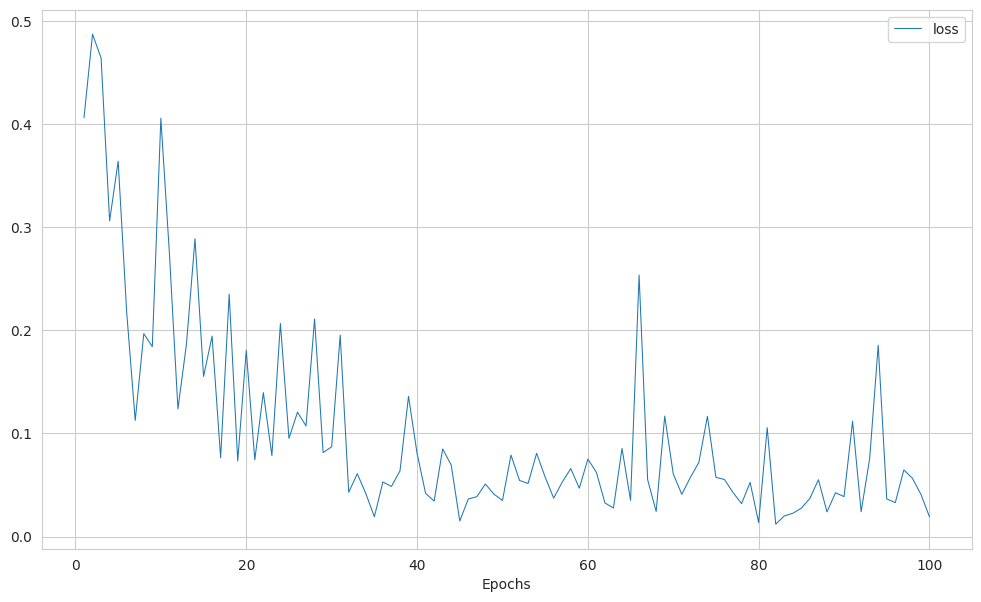

In [17]:
%run tools/analysis_tools/analyze_logs.py plot_curve {latest_config} --keys loss --legend loss

plot curve of work_dirs/resnet101_8xb32_planenbike/20250709_133017/vis_data/scalars.json, metric is accuracy/top1


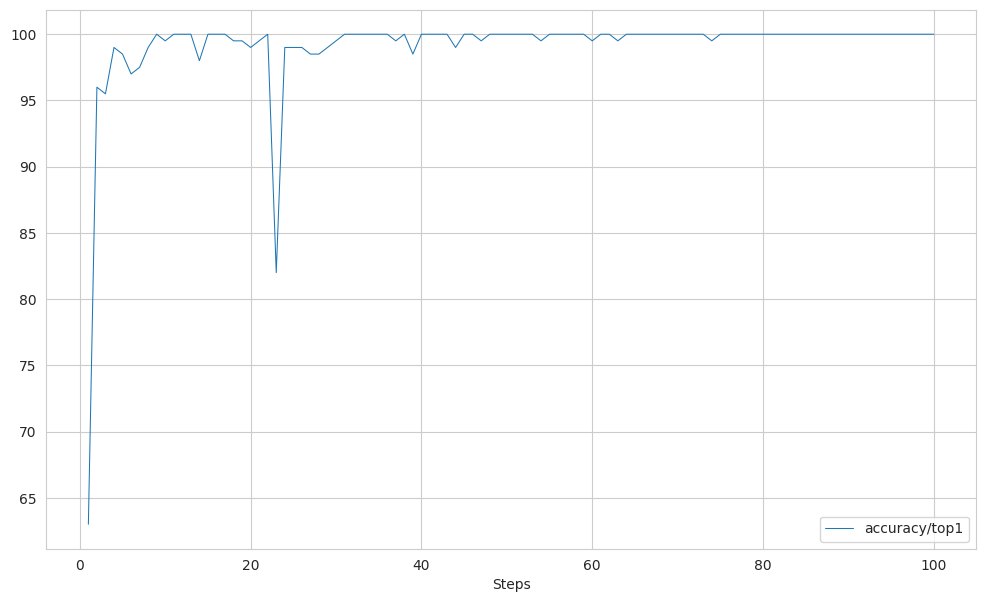

In [18]:
%run tools/analysis_tools/analyze_logs.py plot_curve {latest_config} --keys accuracy/top1 --legend accuracy/top1

# Read the training log
Every epoch, the log prints current training status incluing Loss and learning rate(LR). <br>
and then current accuracy(Acc) in top1 (or also top5 if configs unchanged). <br>

In ideal scenario, training loss decreases and accuracy increases gradually throughout the training. <br> 
When it comes to the end of training, training loss would still decreases slightly, while accuracy stops improving, and it should be already satisfactory. <br>
 <br>
If training loss decreases and accuracy increases slowly, you may increase learning rate (eg double it) <br>
If both training loss and accuracy flutuate violently, you may decrease learning rate (eg half it) <br>
If accuracy is still improving at the end of training, you may increase number of epoch <br>
If training loss decreases while accuracy stagnates or worsens before getting satisfactory accuracy, you should add more samples or implement stronger augmentation, and ensure the two datasets are alike <br>
If both training loss and accuracy stagnates, and the accuracy is not satisfactory, you should consider choosing a more advanced or larger model <br>

# Augmentations

In our resnet sample, there is a very simple augmentation strategy applied. As stated in <br>
train_pipeline:<br>
&nbsp;&nbsp;&nbsp;&nbsp;dict(scale=224, type='RandomResizedCrop'),<br>
&nbsp;&nbsp;&nbsp;&nbsp;dict(direction='horizontal', prob=0.5, type='RandomFlip'),<br>
To create more augmentation, we can add it into train_pipeline <br>
for example, copy the below code (choose either built-in augmentation or Albumentations augmentation) and paste to the above script of training cfg, right above <br>
#------------------------------------------------------ <br>
config=f'./configs/resnet/resnet101_8xb32_planenbike.py' <br>

for more augmentation, you can refer to <br>
https://mmpretrain.readthedocs.io/en/stable/api/data_process.html <br>
for more augmentation in Albumentations, you can refer to <br>
https://github.com/albumentations-team/albumentations <br>
You can view how images are augmented with the script below, the images are saved in the folder visualization/ <br>

In [19]:
%run tools/visualization/browse_dataset.py configs/resnet/resnet101_8xb32_planenbike.py --output-dir ./visualization --not-show

[                                ] 1/1398, 7.7 task/s, elapsed: 0s, ETA:   181s

/home/test/carasml/classification/mm_Resnet/mmengine/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


[                              ] 23/1398, 10.1 task/s, elapsed: 2s, ETA:   136s

KeyboardInterrupt: 

# Inference
Here we inference on a single image <br>

In [20]:
# Inference our trained model
from mmpretrain.apis import inference_model
from mmpretrain.apis import ImageClassificationInferencer

In [21]:
import os
def get_latest_checkpoint(base_dir):
    ckpt_file = os.path.join(base_dir, "last_checkpoint")
    if os.path.exists(ckpt_file):
        with open(ckpt_file, "r") as f:
            relative_ckpt_path = f.readline().strip()
            full_ckpt_path = os.path.join(base_dir, relative_ckpt_path)
            if os.path.exists(full_ckpt_path):
                return full_ckpt_path
    return None

# the logs stored in work_dirs/resnet101_8xb32_planenbike/
latest_ckpt = get_latest_checkpoint("work_dirs/resnet101_8xb32_planenbike/")
print(f"Using checkpoint: {latest_ckpt}")

Using checkpoint: /home/test/carasml/classification/mm_Resnet/mmpretrain/work_dirs/resnet101_8xb32_planenbike/epoch_100.pth


In [22]:
# find the trained model saved in "work_dirs/" and revise the location
# revise the name of .py for your own project
inferencer = ImageClassificationInferencer('work_dirs/resnet101_8xb32_planenbike/resnet101_8xb32_planenbike.py', pretrained=latest_ckpt, device='cuda')

Loads checkpoint by local backend from path: /home/test/carasml/classification/mm_Resnet/mmpretrain/work_dirs/resnet101_8xb32_planenbike/epoch_100.pth


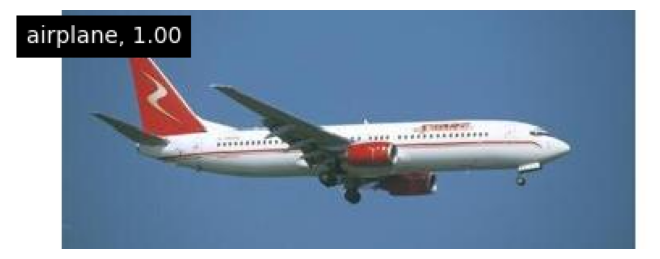

In [23]:
# pick an image
img = './caltech101/val/airplane/image_0700.jpg'
# inference
result = inferencer(img)
# plot
from mmengine.visualization import Visualizer
image = mmcv.imread(img, channel_order='rgb')
pred_score = result[0]['pred_score']
pred_class = result[0]['pred_class']
pred_print = f'{pred_class}, {pred_score:.2f}'
visualizer = Visualizer(image=image)
visualizer.draw_texts(pred_print, torch.tensor([10, 10]), font_sizes=10, colors='white', bboxes=dict(facecolor='black', linewidth=0, alpha=1))
visualizer.show()

# Validation
revise the name of .py and .pkl for your own project <br>
it will save the prediction of all samples in validation set in a pkl

In [24]:
%run tools/test.py work_dirs/resnet101_8xb32_planenbike/resnet101_8xb32_planenbike.py {latest_ckpt} --out output/resnet101_8xb32_planenbike.pkl

07/09 13:36:33 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.18 (main, Jun  5 2025, 13:14:17) [GCC 11.2.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 1472530039
    GPU 0: NVIDIA GeForce RTX 5090
    CUDA_HOME: /usr/local/cuda-12.8/
    NVCC: Cuda compilation tools, release 12.8, V12.8.93
    GCC: gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.7.0+cu128
    PyTorch compiling details: PyTorch built with:
  - GCC 11.2
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2024.2-Product Build 20240605 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.7.1 (Git Hash 8d263e693366ef8db40acc569cc7d8edf644556d)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 12.8
  - NVCC architecture flags: -gencode;arch=compute_75,c

In [25]:
import torch
#after training/testing, clear cache
torch.cuda.empty_cache()
torch.cuda.synchronize()

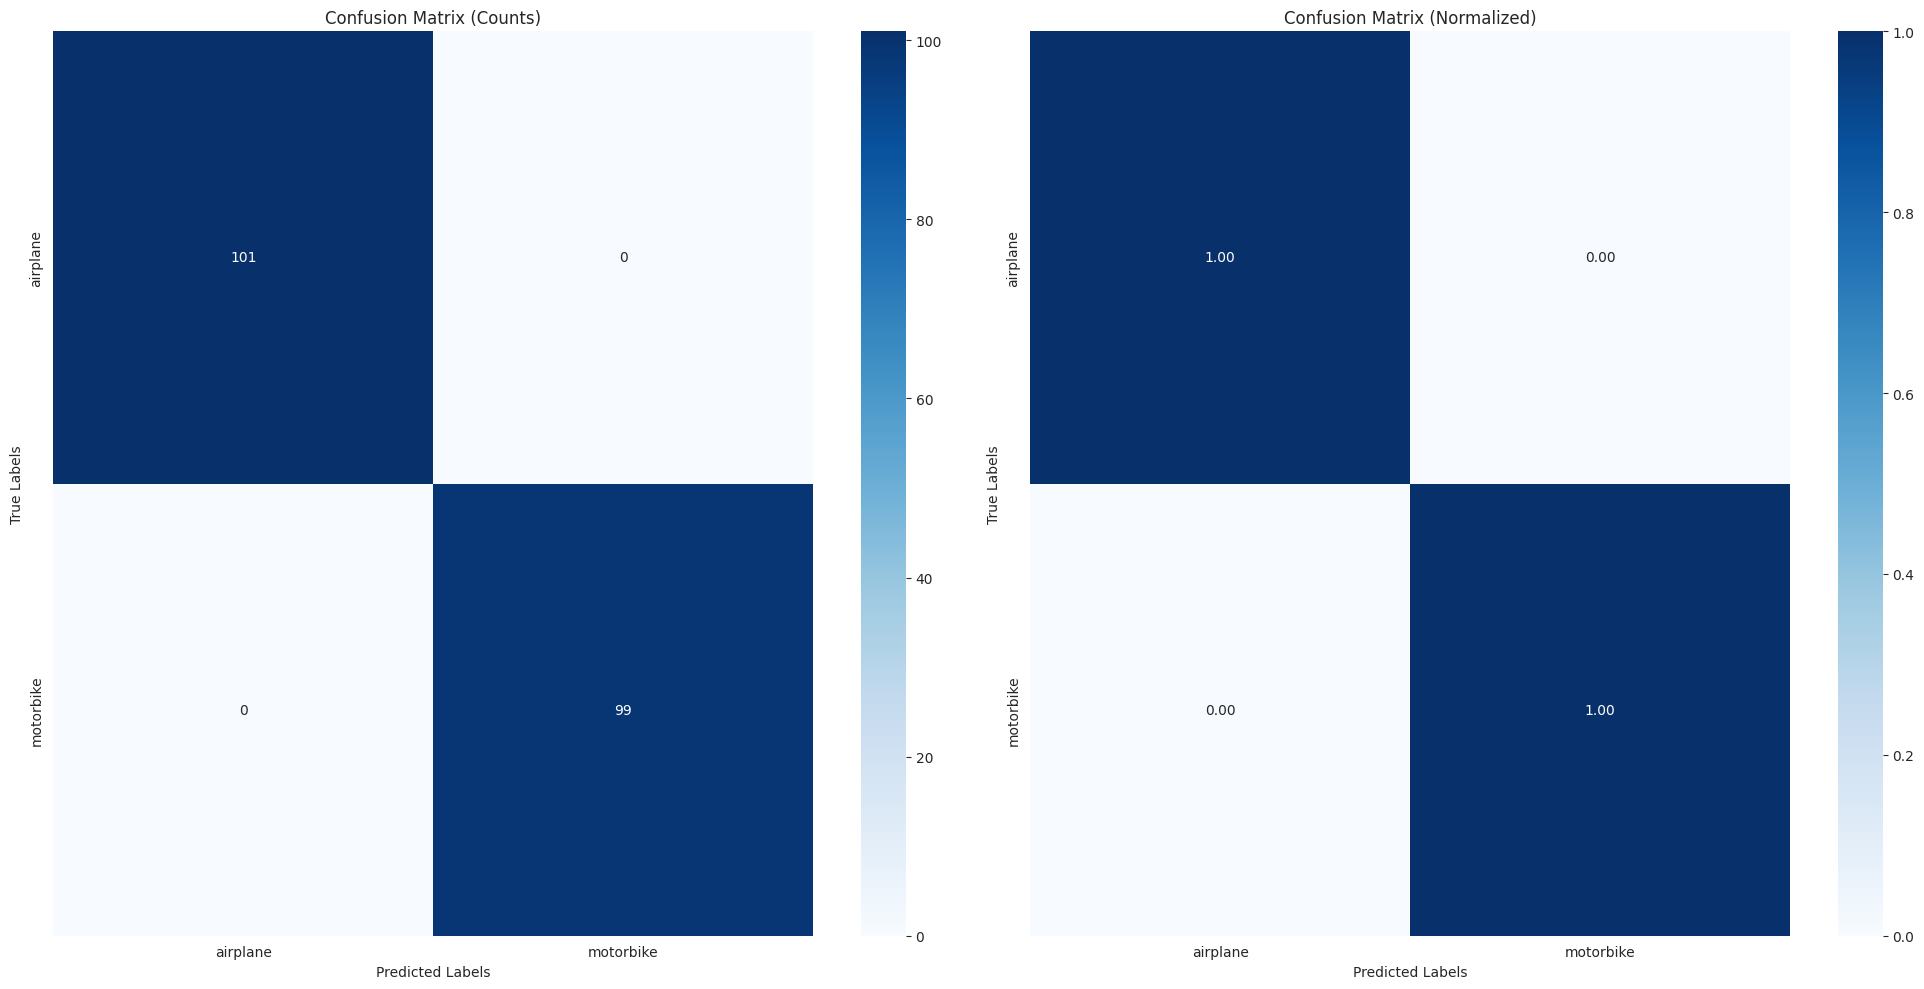

In [26]:
# plot confusion matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pickle

# Load data from .pkl file
file_path = "output/resnet101_8xb32_planenbike.pkl"
with open(file_path, 'rb') as f:
    data = pickle.load(f)

# Extract ground truth and predicted labels
gt_labels = []
pred_labels = []

for entry in data:
    gt_labels.append(entry['gt_label'].item())  # Convert tensor to int
    pred_labels.append(entry['pred_label'].item())

# Define class names (replace with your actual class names)
class_names = ['airplane', 'motorbike']

# Compute confusion matrices
cm = confusion_matrix(gt_labels, pred_labels)
cm_normalized = confusion_matrix(gt_labels, pred_labels, normalize='true')  # Normalized by true labels

# Plot standard confusion matrix
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Counts)')

# Plot normalized confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Normalized)')

plt.tight_layout()
plt.show()
# The counts lie inside the top left to bottom right diagonal are the correct predictions
# The others are wrong predictions, where the x-axis is the predicted label and the y-axis is true label
# eg, the top right corner are the samples that are actually airplane but misclassified as motorbike